## Representação e Preparação de Dados

Fazendo uma exploração dos dados em um dataset com informações sobre alguns três espécies diferentes de penguins.

In [2]:
# Importando as bibliotecas e pacotes necessários

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid',palette='pastel')

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando o dataset

df = pd.read_csv('penguins.csv')
df.head(5)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [9]:
# Retirando a coluna que está dobrando o índice
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [10]:
# Verificando a porcentagem de dados faltando

df_na = df.isna().sum()/(len(df))*100
df_na

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
year                 0.000000
dtype: float64

### Opções para tratamento de missings

In [14]:
# Completando os valores de sexo com a moda
df['sex'].fillna(df['sex'].mode()[0])

0        male
1      female
2      female
3        male
4      female
        ...  
339      male
340    female
341      male
342      male
343    female
Name: sex, Length: 344, dtype: object

In [16]:
# Completando com o valor da média
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())

0      181.000000
1      186.000000
2      195.000000
3      200.915205
4      193.000000
          ...    
339    207.000000
340    202.000000
341    193.000000
342    210.000000
343    198.000000
Name: flipper_length_mm, Length: 344, dtype: float64

In [18]:
# No caso deste dataset, será feito a retirada das linhas com NaN

df = df.dropna()

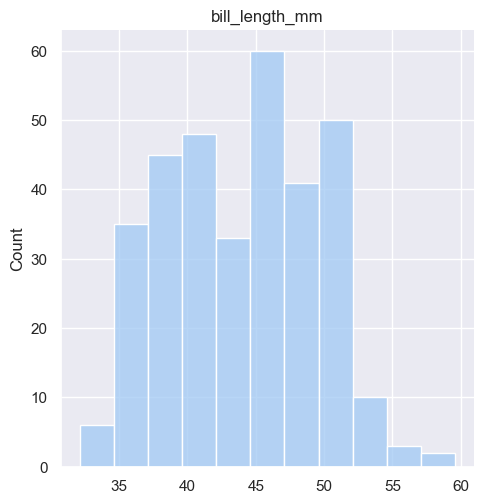

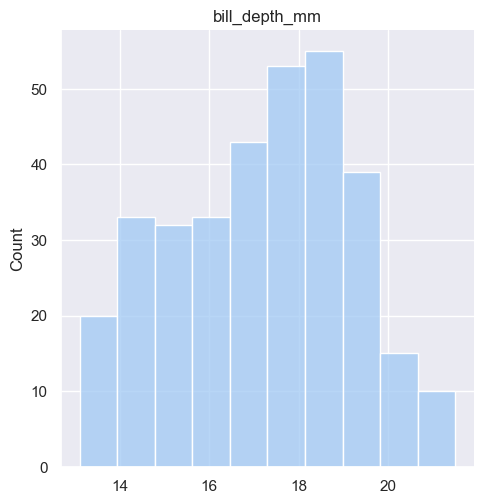

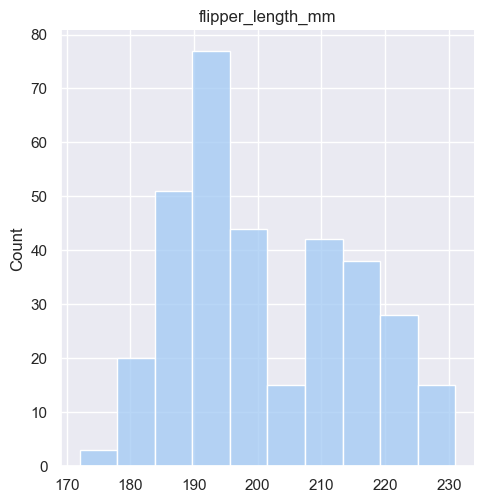

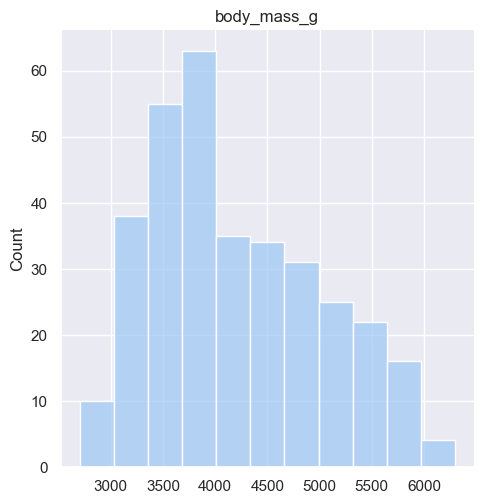

In [19]:
# Verificando outliers

cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

for c in cols:
    sns.displot(df[c].values)\
    .set(title=c)

In [22]:
# Fazendo a separação dos dados em dois dataframes
# um contendo os dados numericos e outro contento
# a espécie dos penguins

x = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = df['species']
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [24]:
# Fazendo a normalização dos dados

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)
x_.max()

1.0

## Algoritmos de Agrupamento

In [25]:
# Importando o KMeans

from sklearn.cluster import KMeans

In [27]:
# Fazendo um DF com o comprimento do bico e comprimento da asa

x2 = x_[:,[0,2]]
x2

array([[0.25454545, 0.15254237],
       [0.26909091, 0.23728814],
       [0.29818182, 0.38983051],
       [0.16727273, 0.3559322 ],
       [0.26181818, 0.30508475],
       [0.24727273, 0.15254237],
       [0.25818182, 0.38983051],
       [0.32727273, 0.16949153],
       [0.23636364, 0.3220339 ],
       [0.09090909, 0.44067797],
       [0.16363636, 0.22033898],
       [0.24      , 0.38983051],
       [0.37818182, 0.42372881],
       [0.08363636, 0.20338983],
       [0.50545455, 0.37288136],
       [0.20727273, 0.03389831],
       [0.20363636, 0.13559322],
       [0.13818182, 0.28813559],
       [0.22181818, 0.22033898],
       [0.24363636, 0.13559322],
       [0.11636364, 0.25423729],
       [0.30909091, 0.18644068],
       [0.30545455, 0.25423729],
       [0.21090909, 0.        ],
       [0.30545455, 0.13559322],
       [0.26909091, 0.10169492],
       [0.18545455, 0.10169492],
       [0.26909091, 0.27118644],
       [0.32      , 0.20338983],
       [0.15636364, 0.38983051],
       [0.

In [28]:
# Treinando o algoritmo para k=3
# utilizando os dados de comprimento de bico e de asa

kmeans = KMeans(n_clusters=3, random_state=3, n_init='auto').fit(x2)
labels = kmeans.labels_

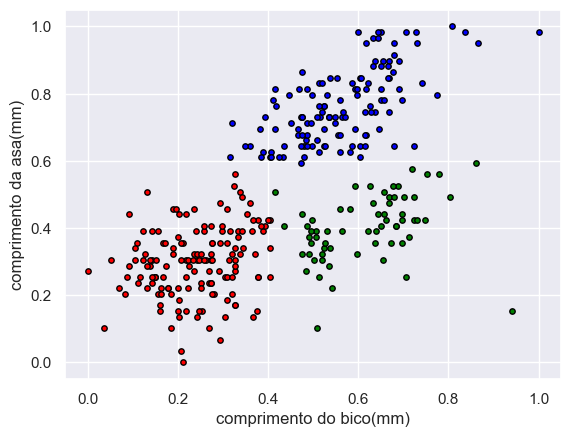

In [32]:
# Plotando os dados com os clusters do KMeans

plt.scatter(x2[labels==0,0], x2[labels==0,1], color = 'blue', edgecolors='black',s=15)
plt.scatter(x2[labels==1,0], x2[labels==1,1], color = 'red', edgecolors='black',s=15)
plt.scatter(x2[labels==2,0], x2[labels==2,1], color = 'green', edgecolors='black',s=15)
plt.xlabel('comprimento do bico(mm)')
plt.ylabel('comprimento da asa(mm)')
plt.show()

## Algoritmos de Densidade

In [33]:
# Importando o DBSCAN

from sklearn.cluster import DBSCAN

In [38]:
# Treinando o algoritmo com os dados do comprimento da asa
# e do bico, utilizando uma distância epsilon de 0.07
# e um mínimo de pontos como 10

db = DBSCAN(eps=0.07, min_samples=10).fit(x2)
labels = db.labels_

In [39]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

In [41]:
# Fazendo a contagem do número de clusters e do número
# de pontos considerados ruídos. O DBSCAN considera os ruídos
# como um cluster com label -1

n_cluster_x2 = len(set(labels))-(1 if -1 in labels else 0)
n_noise_x2 = list(labels).count(-1)

print ("Número estimado de clusters: %d" % n_cluster_x2)
print ("Número estimado de ruídos: %d" % n_noise_x2)

Número estimado de clusters: 2
Número estimado de ruídos: 26


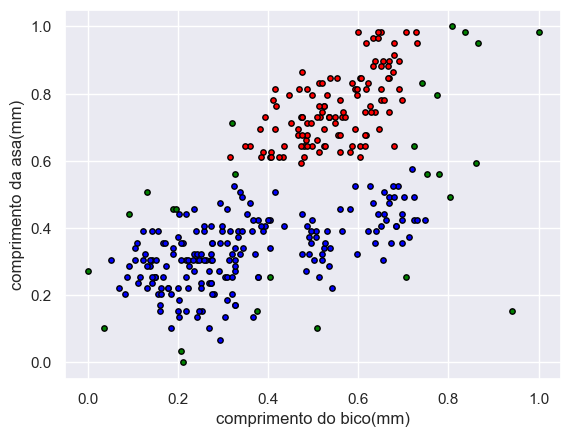

In [42]:
# Plotando os dados com os clusters do DBSCAN

plt.scatter(x2[labels==0,0], x2[labels==0,1], color = 'blue', edgecolors='black',s=15)
plt.scatter(x2[labels==1,0], x2[labels==1,1], color = 'red', edgecolors='black',s=15)
plt.scatter(x2[labels==-1,0], x2[labels==-1,1], color = 'green', edgecolors='black',s=15)
plt.xlabel('comprimento do bico(mm)')
plt.ylabel('comprimento da asa(mm)')
plt.show()

## Agrupamento Hierárquico

In [48]:
# Importando as ferramentas

from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(x2)

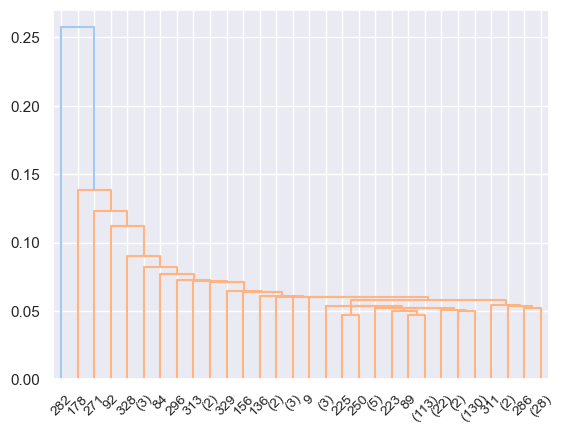

In [50]:
dendrogram(z, truncate_mode='lastp');

## Avaliação dos grupos

In [53]:
# Importando e verificando o silhouette scoree para os diferentes
# metodos de clusterização

from sklearn.metrics import silhouette_score

silhouette_score(x2,kmeans.labels_)

0.5188528351442626

In [55]:
silhouette_score(x2,db.labels_)

0.423048386207748

Quando mais próximo de 1 o valor estiver, melhor o agrupamento feito.

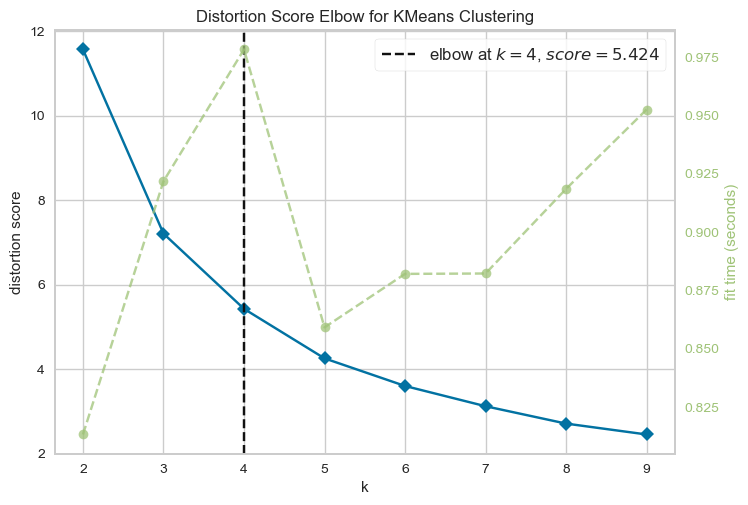

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Verificando, através do método do cotovelo, qual seria
# o número excelente de k para o KMeans., calculado com
# diferentes métodos.

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion',timing = True)
visualizer.fit(x2)
visualizer.show()

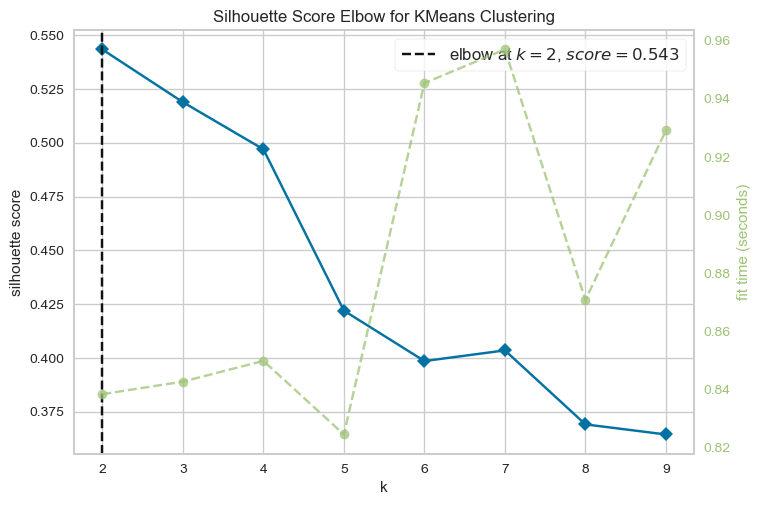

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [62]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette',timing = True)
visualizer.fit(x2)
visualizer.show()

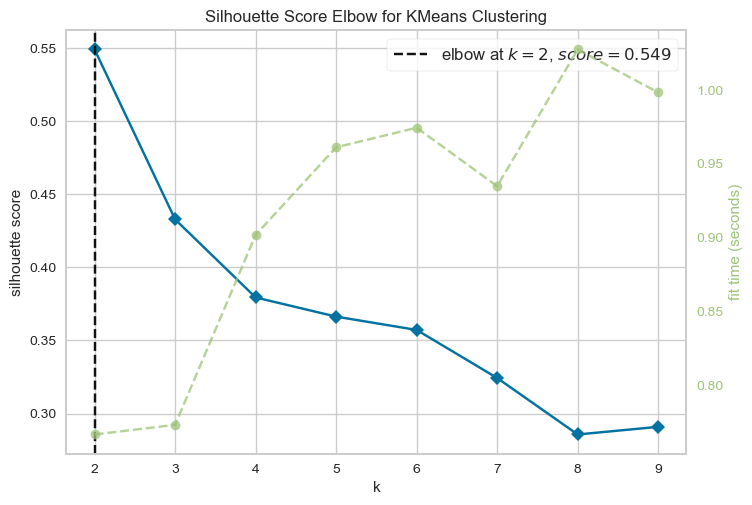

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [67]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette',timing = True)
visualizer.fit(x_)
visualizer.show()

Caso não tivessemos, no próprio dataset, uma definição do número de clusters, baseado nas espécies de penguins, seria feita uma escolha de 4 agrupamentos utilizando o método de cotovelo com a métrica de distorção e 2 agrupamentos utilizando o método de cotovelo com a métrica de silhueta.